In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [152]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

C:\Users\Ut Luom\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (35,43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Ut Luom\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (34,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [153]:
df_train.head()

,id,label,Field_1,Field_2,Field_3,Field_4,Field_5,Field_6,Field_7,Field_8,...,partner5_H,partner5_K,partner5_L,brief,num_of_phone,Field_78,Field_79,Field_80,Field_81,Field_82
0,0,1,2019-07-24T03:39:02.854Z,2019-07-31T20:10:02Z,1.0,GH,2018-12-27,2018-12-27,2019-01-01,2019-07-31,...,0.0,0.0,0.0,cb1,1.0,NaN,NaN,NaN,NaN,1
1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,4,1.0,NaN,NaN,NaN,NaN,1
2,2,0,2019-01-17T07:15:26.367Z,2019-01-17T07:17:45Z,2.0,T1,2019-01-17,2019-01-17,2019-01-01,2019-12-31,...,0.0,0.0,0.0,1,1.0,33.0,10.769445,6.466667,0.0,2
3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,1.0,33.0,10.769445,6.466667,0.0,3
4,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,1.0,33.0,10.769445,6.466667,0.0,3


In [154]:
df_train.isnull().sum()

id              0
label           0
Field_1     27466
Field_2     27466
Field_3     27466
            ...  
Field_78    16633
Field_79    25248
Field_80    16710
Field_81    17049
Field_82        0
Length: 195, dtype: int64

## Understanding data

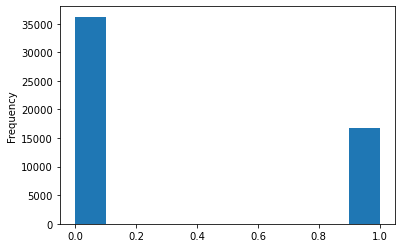

In [155]:
df_train["label"].astype(int).plot.hist();

Nhận xét:

- Mất cân bằng: Có nhiều khoản vay trả đúng hạn hơn so với những khoản vay không được hoàn trả

In [156]:
df_train.shape

(53030, 195)

In [157]:
df_test.shape

(20381, 194)

Trong bộ data test không có cột 'label'

# Group Data

In [158]:
# Gộp hai bộ dữ liệu
df_all = pd.concat([df_train], axis=0,sort=False)

trong biến df_all không có nhãn 'label'

In [159]:
label = df_train['label']

In [160]:
df_all.shape

(53030, 195)

In [161]:
numeric_cols = df_all.select_dtypes(['float', 'int']).columns
categoric_cols = df_all.select_dtypes('object').columns

### Nhóm I:

In [162]:
#xử lí date và dateTime
Date = ['Field_{}'.format(i) for i in [5, 6, 7, 8, 9, 11, 15, 25, 33, 34, 35, 40]]
DateTime = ['Field_{}'.format(i) for i in [1, 2, 43, 44]]
df_all[Date + DateTime + ['Field_34']].sample(10)
# sampl: ý nghĩa lấy bất cứ dòng nào có trong dataset

,Field_5,Field_6,Field_7,Field_8,Field_9,Field_11,Field_15,Field_25,Field_33,Field_34,Field_35,Field_40,Field_1,Field_2,Field_43,Field_44,Field_34
45435,2019-03-22,2019-03-22,2019-03-01,2019-12-31,2019-03-22,NaN,2019-03-25,2019-03-22,2024-03-01,20190306,NaN,2019-03-01,2019-03-22T14:58:54.93Z,2019-03-25T02:07:18Z,2017-01-03T16:42:13.06Z,2019-07-26T01:48:21.838Z,20190306
17629,2019-11-24,2019-11-24,2019-12-01,2020-11-30,2019-11-24,NaN,NaN,2019-11-24,2019-12-01,20191244,NaN,2019-12-01,2019-11-24T13:05:38.683Z,2019-11-24T13:06:56Z,2017-02-07T11:11:44.147Z,2019-11-01T07:16:06.719Z,20191244
15988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8744,2018-12-28,2018-12-28,2019-01-01,2019-12-31,2018-12-28,NaN,NaN,2018-12-28,2022-10-01,20181208,NaN,2019-01-01,2018-12-28T05:47:07.763Z,2018-12-28T06:05:02Z,2017-01-13T11:53:11.85Z,2019-06-28T02:29:30.316Z,20181208
10622,2019-11-25,2019-11-25,2019-11-01,2019-12-31,2019-11-25,NaN,2019-11-26,2019-11-25,2024-04-01,20191102,NaN,2019-11-01,2019-11-25T08:34:54.212Z,2019-11-26T07:43:26Z,2017-01-20T12:27:50.943Z,2019-11-18T04:01:46.979Z,20191102
47735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6479,2018-11-09,2018-11-09,2018-12-06,2019-12-05,2018-11-09,2019-12-05,2018-11-09,2018-11-09,2023-12-06,20181209,2019-12-05,NaN,2019-11-18T02:36:41Z,2019-12-05T19:10:12Z,2017-01-21T09:30:28.113Z,2019-02-18T02:14:51.263Z,20181209
32865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
#xử lí thằng Field_34
#hàm chung cho field_34 và ngaySinh
def process_field_34(x):
    if x != x:
        return np.nan
    try:
        x = int(x)
    except ValueError:
        x = x.split(' ')[0]
    
    return datetime.strptime(str(x)[:6], "%Y%m")

In [164]:
#xử lí feature date
#hàm chung cho đối tượng datetime(d-m-y)
def process_date(x):
    if x != x:
        return np.nan
    try:
        date_obj = datetime.strptime(x, '%m/%d/%Y')
    except:
        date_obj = datetime.strptime(x, '%Y-%m-%d')
    return date_obj

#xử lí feature datetime
# xử lí datetime có trong df_all mà có dạng T & Z
def process_datetime(x):
    if x != x:
        return np.nan
    x = x.split('.')[0]
    
    if x[-1] == 'Z':
        x = x[:-1]
    date, time = x.split('T')
    datetime_obj = datetime.strptime(x, "%Y-%m-%dT%H:%M:%S")
    return datetime_obj

In [165]:
# Xử lí nhóm thứ nhất
def process_nhom_I_cols(df):
    cat_cols = []
    for col in Date:
        if col == 'Field_34':
            continue
        df[col] = df[col].apply(process_date) #gọi lại hàm xử lí đối tượng 'date'
        
    for col in DateTime:
        df[col] = df[col].apply(process_datetime) #gọi lại hàm xử lí 'datetime'
 
    df['Field_34'] = df['Field_34'].apply(process_field_34) #gọi lại hàm xử lí 'field_34'
    #df['ngaySinh'] = df['ngaySinh'].apply(process_field_34)
    cat_cols += Date + DateTime
    for col in Date + DateTime:
        df[col] = df[col].dt.strftime('%m-%Y')
    
    # các cọt có ngày tháng năm có trong _startDate và _endDate
    for cat in ['F', 'E', 'C', 'G', 'A']:
        df[f'{cat}_startDate'] = pd.to_datetime(df[f"{cat}_startDate"], infer_datetime_format=True)
        df[f'{cat}_endDate'] = pd.to_datetime(df[f"{cat}_endDate"], infer_datetime_format=True)
        
        df[f'{cat}_startDate'] = df[f'{cat}_startDate'].dt.strftime('%m-%Y')
        df[f'{cat}_endDate'] = df[f'{cat}_endDate'].dt.strftime('%m-%Y')
        
        cat_cols.append(f'{cat}_startDate')
        cat_cols.append(f'{cat}_endDate')
    
    for col in cat_cols:
        df[col] = df[col].astype('category')
    
    return df

### Nhóm II

In [166]:
# Trong nhóm II có 6 cột thỏa mãn: CJ, CK, CL, CM, CN, CO (số)
# Có nhiều số 0 trong các cột này (dựa vào tableu) gây nhiễu, loại bỏ
def prepare_process_II(df):
    df = str(df).strip().lower()
    df = re.sub(' +', ' ', df)
    return df

def process_II_cols(df):
    for col in ['currentLocationLocationId', 'currentLocationLatitude', 'currentLocationLongitude',
                'homeTownLocationId', 'homeTownLatitude', 'homeTownLongitude']:
        df[col].replace(0, np.nan, inplace=True)
    df['currentLocationLocationId'] = df['currentLocationLocationId'].apply(prepare_process_II).astype('category')
    df['homeTownLocationId'] = df['homeTownLocationId'].apply(prepare_process_II).astype('category')
    return df

### Nhóm III

In [167]:
def prepare_process_III(df):
    df = str(df).strip().lower()
    df = re.sub(' + ', ' ', df)
    return df

def job_category(x):
    if type(x) == str:
        if "công nhân" in x or "cnv" in x or "cn" in x or "may công nghiệp" in x or "lao động" in x\
        or "thợ" in x or "coõng nhaõn trửùc tieỏp maựy may coõng nghieọp" in x or "c.n" in x or "lđ" in x\
        or "CN" in x or "CNhân" in x or "Cnhân" in x or "CNV" in x:
            return "CN"
        elif "giáo viên" in x or "gv" in x or "gíao viên" in x:
            return "GV"
        elif "nhân viên" in x or "kế toán" in x or "cán bộ" in x or "nv" in x or "cb" in x or "nhõn viờn" in x:
            return "NV"
        elif "tài xế" in x or "lái" in x or "tài xê" in x:
            return "TX"
        elif "quản lý" in x or "phó phòng" in x or "hiệu phó" in x:
            return "QL"
        elif "undefined" in x:
            return "missing"
        elif "giám đốc" in x or "hiệu trưởng" in x:
            return "GĐ"
        elif "phục vụ" in x:
            return "PV"
        elif "chuyên viên" in x:
            return  "CV"
        elif "bác sĩ" in x or "dược sĩ" in x or "y sĩ" in x or "y sỹ" in x:
            return "BS"
        elif "y tá" in x:
            return "YT"
        elif "hộ sinh" in x:
            return "HS"
        elif "chủ tịch" in x:
            return "CT"
        elif "bếp" in x:
            return "ĐB"
        elif "sư" in x:
            return "KS"
        elif "dưỡng" in x:
            return "ĐD"
        elif "kỹ thuật" in x or "kĩ thuật" in x:
            return "KTV"
        elif "diễn viên" in x:
            return "DV"
        else:
            return "missing"
    else:
        return x
    
def process_III_cols(df):
    df["maCv"] = df["maCv"].apply(prepare_process_III).apply(job_category).astype("category")
    return df

### Nhóm IV

In [168]:
#Gộp hai nhóm này lại để giảm bớt trường hợp thiếu
#hàm kết nối hai feature trên thành lại một feature có tên là "Giới Tính"
def prepare_process_IV(df):
    x, y = df
    if x != x and y != y:
        return 'nan'
    if x != x:
        return y.lower()
    return x.lower()

def process_IV_cols(df):
    df["Giới Tính"] = df[['gioiTinh', 'info_social_sex']].apply(prepare_process_IV, axis=1).astype('category')
    return df

### Nhóm V

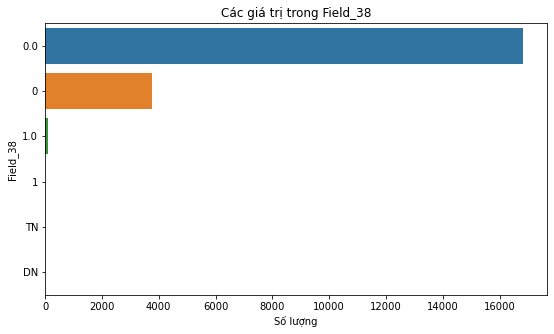

In [169]:
#Xem lại Field_38
plt.subplots(figsize=(9,5))
sns.countplot(y="Field_38", data=df_train,order=df_train["Field_38"].value_counts().index)
plt.title("Các giá trị trong Field_38")
plt.xlabel("Số lượng")
plt.show();

In [170]:
def prepare_process_V(df):
    df = str(df).strip().lower()
    df = re.sub(' + ', ' ', df)
    return df

def process_V_cols(df):
    # mã hóa lại các cột sau:
    df['Field_62'] = df['Field_62'].map({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5})
    df['Field_47'] = df['Field_47'].map({'Zezo': 0, 'One': 1, 'Tw0': 2, 'Three': 3, 'Four': 4})
    
    # xử lí các cột có nhiều số 0.0
    df["Field_27"] = df["Field_27"].replace({0.0: np.nan})
    df["Field_28"] = df["Field_28"].replace({0.0: np.nan})
    df["Field_19"] = df["Field_19"].replace({0.0: np.nan})
    df["Field_29"] = df["Field_29"].replace({0.0: np.nan})
    
    # xử lí biến categorical
    df['friendCount'] = df['friendCount'].replace(0.0, np.nan, inplace=True)
    df['subscriberCount'] = df['subscriberCount'].replace(0.0, np.nan, inplace=True)
    
    #xử lí field_38
    df['Field_38'] = df['Field_38'].map({0: 0.0, 1: 1.0, 'DN': np.nan, 'TN': np.nan })
    
    for col in df.columns:
        if df[col].dtype.name == 'object':
            df[col] = df[col].apply(prepare_process_V).astype('category')
    
    return df

In [171]:
#Drop những cột không cần thiết
drop = ['Field_14', 'Field_16', 'Field_17', 'Field_24', 'Field_26', 'Field_30', 'Field_31', 'Field_37', 'Field_52',
        'Field_57', 'partner0_B', 'partner0_K', 'partner0_L', 'partner1_B', 'partner1_D', 'partner1_E', 'partner1_F',
        'partner1_K', 'partner1_L', 'partner2_B', 'partner2_G', 'partner2_K', 'partner2_L', 'partner3_B', 'partner3_F',
        'partner3_G', 'partner3_H', 'partner3_K', 'partner3_L', 'partner4_A', 'partner4_B', 'partner4_C', 'partner4_D',
        'partner4_E', 'partner4_F', 'partner4_G', 'partner4_H', 'partner4_K', 'partner4_L', 'partner5_B', 'partner5_C',
        'partner5_H', 'partner5_K', 'partner5_L', 'Field_34', 'info_social_sex', 'data.basic_info.locale', 'homeTownCountry',
        'Field_2', 'Field_5', 'Field_49', 'Field_9', 'gioiTinh', 'ngaySinh', 'namSinh']

def transform(df):
    df = process_nhom_I_cols(df)
    df = process_II_cols(df)
    df = process_III_cols(df)
    df = process_IV_cols(df)
    df = process_V_cols(df)
    return df.drop(drop, 1)

In [172]:
# kết nối lại tất cả các feature lại với nhau
all_data = transform(df_all.copy())

In [173]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53030 entries, 0 to 53029
Columns: 141 entries, id to Giới Tính
dtypes: category(52), float64(86), int64(3)
memory usage: 43.1 MB


# Handling Missing

xem các thông tin các cột bị thiếu data

In [174]:
# Hàm tính tổng các giá trị còn thiếu
def missing_values(df):
    mis_val = df.isnull().sum() #tổng các giá trị còn thiếu
    mis_val_per = 100 * df.isnull().sum()/len(df) #Phần trăm các giá trị còn thiếu
    mis_val_table = pd.concat([mis_val, mis_val_per], axis=1) #Tạo thành bảng để thể hiện 2 giá trị trên
    mis_val_table_rename = mis_val_table.rename(
    columns = {0: "Thiếu", 1 : "Chiếm %"})
    #Sắp xếp bảng theo tỉ lệ phần trăm giảm dần
    mis_val_table_rename = mis_val_table_rename[mis_val_table_rename.iloc[:, 1] != 0].sort_values("Chiếm %", ascending=False).round(1)
    print("Có tất cả " + str(df.shape[1]) + " cột.\n"
          "Trog đó có " + str(mis_val_table_rename.shape[0]) + " cột bị thiếu data")
    return mis_val_table_rename

In [175]:
missing = missing_values(all_data)
missing.head(20)

Có tất cả 141 cột.
Trog đó có 108 cột bị thiếu data


,Thiếu,Chiếm %
Field_28,50880,95.9
Field_27,50796,95.8
Field_19,50049,94.4
Field_35,46198,87.1
Field_11,45616,86.0
homeTownLatitude,40676,76.7
homeTownLongitude,40676,76.7
currentLocationLatitude,39521,74.5
currentLocationLongitude,39521,74.5
Field_15,37322,70.4


In [176]:
#Những columns có trên 80% missing thì loại bỏ
all_data = all_data.drop(columns=['Field_28', 'Field_27', 'Field_19', 'Field_35', 'Field_11'], axis=1)

In [177]:
mis_val = missing_values(all_data)
mis_val

Có tất cả 136 cột.
Trog đó có 103 cột bị thiếu data


,Thiếu,Chiếm %
homeTownLatitude,40676,76.7
homeTownLongitude,40676,76.7
currentLocationLatitude,39521,74.5
currentLocationLongitude,39521,74.5
Field_15,37322,70.4
...,...,...
partner0_F,4747,9.0
partner0_E,4747,9.0
partner0_D,4747,9.0
partner2_C,4747,9.0


In [178]:
all_data = all_data.drop(['id'], axis=1)

In [179]:
all_data.head()

,label,Field_1,Field_3,Field_4,Field_6,Field_7,Field_8,Field_10,Field_12,Field_13,...,partner5_F,partner5_G,brief,num_of_phone,Field_78,Field_79,Field_80,Field_81,Field_82,Giới Tính
0,1,07-2019,1.0,gh,12-2018,01-2019,07-2019,1.0,g8,1.0,...,0.0,0.0,cb1,1.0,NaN,NaN,NaN,NaN,1,male
1,0,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,...,0.0,0.0,4,1.0,NaN,NaN,NaN,NaN,1,nan
2,0,01-2019,2.0,t1,01-2019,01-2019,12-2019,1.0,nan,1.0,...,0.0,0.0,1,1.0,33.0,10.769445,6.466667,0.0,2,female
3,0,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,...,NaN,NaN,1,1.0,33.0,10.769445,6.466667,0.0,3,nan
4,1,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,...,NaN,NaN,1,1.0,33.0,10.769445,6.466667,0.0,3,nan


In [180]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53030 entries, 0 to 53029
Columns: 135 entries, label to Giới Tính
dtypes: category(50), float64(83), int64(2)
memory usage: 41.4 MB


# Phân loại đối tượng

In [181]:
numeric_cols = all_data.select_dtypes(exclude=['object', 'category'])
object_cols = all_data.select_dtypes(include=['object', 'category'])

### 1.Làm việc với numeric

In [182]:
numeric_cols.dtypes

label         int64
Field_3     float64
Field_10    float64
Field_13    float64
Field_20    float64
             ...   
Field_78    float64
Field_79    float64
Field_80    float64
Field_81    float64
Field_82      int64
Length: 85, dtype: object

In [183]:
label = numeric_cols['label']

In [184]:
numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53030 entries, 0 to 53029
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   label                     53030 non-null  int64  
 1   Field_3                   25564 non-null  float64
 2   Field_10                  25564 non-null  float64
 3   Field_13                  25564 non-null  float64
 4   Field_20                  25564 non-null  float64
 5   Field_21                  25564 non-null  float64
 6   Field_22                  25564 non-null  float64
 7   Field_23                  25564 non-null  float64
 8   Field_29                  16595 non-null  float64
 9   Field_38                  16936 non-null  float64
 10  Field_39                  25564 non-null  float64
 11  Field_41                  25564 non-null  float64
 12  Field_42                  25564 non-null  float64
 13  Field_47                  23778 non-null  float64
 14  Field_

In [185]:
mis_numeric = missing_values(numeric_cols)
mis_numeric

Có tất cả 85 cột.
Trog đó có 83 cột bị thiếu data


,Thiếu,Chiếm %
homeTownLongitude,40676,76.7
homeTownLatitude,40676,76.7
currentLocationLongitude,39521,74.5
currentLocationLatitude,39521,74.5
Field_29,36435,68.7
...,...,...
partner0_D,4747,9.0
partner0_C,4747,9.0
partner0_A,4747,9.0
partner2_A,4747,9.0


import sweetviz as sv

advert_report = sv.analyze(numeric_cols)
advert_report.show_html("numeric_cols.html")

Thông qua thư viện sweetz ta có thể loại bỏ những cột sau

In [186]:
numeric_cols = numeric_cols.drop(columns=['Field_10', 'Field_13', 'Field_21', 'Field_22', 'Field_38','Field_41', 'Field_42',
                                          'Field_50', 'Field_53', 'Field_62', 'currentLocationLongitude', 'homeTownLongitude',
                                          'E_numQuery', 'C_numOrg', 'C_numQuery', 'G_numQuery', 'A_numQuery', 'summary_6m',
                                          'summary_3m', 'summary_1m', 'summary_1w', 'partner0_C', 'partner0_D', 'partner0_E',
                                          'partner0_F', 'partner0_H', 'partner1_C', 'partner1_G', 'partner1_H', 'partner2_A',
                                          'partner2_C', 'partner2_D', 'partner2_E', 'partner2_H', 'partner3_C', 'partner3_E',
                                          'partner5_D', 'partner5_E', 'partner5_F', 'partner5_G'], axis=1)

In [187]:
numeric_cols = numeric_cols.drop(['num_of_phone'], axis=1)

In [188]:
numeric_cols = numeric_cols.drop(['Field_51', 'Field_73','partner2_F'], axis=1)

In [189]:
missing_numeric = missing_values(numeric_cols)
missing_numeric

Có tất cả 41 cột.
Trog đó có 39 cột bị thiếu data


,Thiếu,Chiếm %
homeTownLatitude,40676,76.7
currentLocationLatitude,39521,74.5
Field_29,36435,68.7
Field_74,32372,61.0
topFriends,32364,61.0
Field_77,29502,55.6
Field_76,29502,55.6
Field_75,29502,55.6
G_numOrg,29372,55.4
Field_47,29252,55.2


advert_report = sv.analyze(numeric_cols)
advert_report.show_html("numeric_cols_drop.html")

Sau khi đã loại bỏ những feature có các giá trị giống nhau và chênh lệch nhau. 
Tiếp theo, Handlling Data

Vì là mới bắt đầu nên ta sẽ fill bằng giá trị mean()

In [190]:
def fill_mean_train(df):
    for col in df.columns:
        mean = df[col].mean()
        df[col] = df[col].fillna(mean)
    return df

In [191]:
numeric_cols = fill_mean_train(numeric_cols)

In [192]:
#Kiểm tra lại giá trị có còn thiếu hay không
missing_val = missing_values(numeric_cols)

Có tất cả 41 cột.
Trog đó có 0 cột bị thiếu data


In [193]:
numeric_cols.shape

(53030, 41)

In [194]:
numeric_cols

,label,Field_3,Field_20,Field_23,Field_29,Field_39,Field_47,Field_58,Field_59,Field_60,...,partner0_G,partner1_A,partner3_A,partner3_D,partner5_A,Field_78,Field_79,Field_80,Field_81,Field_82
0,1,1.000000,4.258600e+06,16.00000,10.087315,1.000000,4.000000,0.000000,5.000000,3.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,20.80144,30.911307,-1.793163,-32.149412,1
1,0,1.538687,3.603181e+06,31.47254,10.087315,0.809537,1.362814,1.166289,14.984431,13.416148,...,0.000000,1.00000,0.00000,0.000000,0.000000,20.80144,30.911307,-1.793163,-32.149412,1
2,0,2.000000,5.000000e+06,10.00000,10.087315,1.000000,0.000000,0.000000,5.000000,3.000000,...,0.000000,0.00000,1.00000,0.000000,1.000000,33.00000,10.769445,6.466667,0.000000,2
3,0,1.538687,3.603181e+06,31.47254,10.087315,0.809537,1.362814,1.166289,14.984431,13.416148,...,0.443054,0.49651,0.34188,0.210778,0.254334,33.00000,10.769445,6.466667,0.000000,3
4,1,1.538687,3.603181e+06,31.47254,10.087315,0.809537,1.362814,1.166289,14.984431,13.416148,...,0.443054,0.49651,0.34188,0.210778,0.254334,33.00000,10.769445,6.466667,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53025,0,1.000000,1.490000e+06,5.00000,12.000000,1.000000,1.000000,0.000000,6.000000,4.000000,...,0.000000,1.00000,1.00000,0.000000,0.000000,202.00000,157.837469,14.000000,-183.000000,1
53026,0,1.538687,3.603181e+06,31.47254,10.087315,0.809537,1.362814,1.166289,14.984431,13.416148,...,1.000000,1.00000,0.00000,0.000000,0.000000,26.00000,10.246951,12.500000,2.000000,1
53027,0,2.000000,4.015000e+06,0.00000,10.087315,1.000000,1.000000,0.000000,4.000000,2.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,20.80144,30.911307,-1.793163,-32.149412,1
53028,0,1.538687,3.603181e+06,31.47254,10.087315,0.809537,1.362814,1.166289,14.984431,13.416148,...,0.000000,1.00000,0.00000,0.000000,0.000000,20.80144,30.911307,-1.793163,-32.149412,4


In [195]:
numeric_cols['label'].value_counts()

0    36234
1    16796
Name: label, dtype: int64

## Model for Numeric

## 1.Logistic Regression

In [196]:
from sklearn.model_selection import train_test_split

X = numeric_cols.values
Y = numeric_cols['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 200)

In [197]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.001)
log_reg.fit(X_train, Y_train)

LogisticRegression(C=0.001)

In [199]:
from sklearn import metrics

prediction_LR = log_reg.predict(X_test)
print("Logistic Regression's Accuracy: ",metrics.accuracy_score(Y_test, prediction_LR))

Logistic Regression's Accuracy:  0.684203909736627
